<a href="https://colab.research.google.com/github/malvibid/COMP3029-Computer-Vision/blob/main/COMP3029_Computer_Vision_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP3029 COMPUTER VISION COURSEWORK** 

*Spring 2022/2023*, School of Computer Science, University of Nottingham Malaysia

```
GROUP 4: 
  20306551 - Mustafa Mehmood
  20311657 - Omar Ismail
  20311860 - Gabriel Hoh Chao Jei
  20187945 - Malvi Bid
```





# Import Dependencies

In [1]:
import os
import torch
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from google.colab import drive

# Mount google drive

In [2]:
# Mount drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Dataset folder structure

In [3]:
!ls -F '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/'

Batch-1/  Batch-2/  Batch-3/  temp_to_delete/


In [4]:
print("Batch-1/ ")
!ls -F -X '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1'
print("\nBatch-2/ ")
!ls -F -X '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-2'
print("\nBatch-3/ ")
!ls -F -X '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-3'

Batch-1/ 
seedsegment@  seedsplit@

Batch-2/ 
NormalRoomLighting@  NormalRoomLight_annotation.csv

Batch-3/ 
LightBox@  LightBox_annotation.csv


## Dataset structure tree


```
.
└── Datasets/
    ├── Batch-1/
    │   └── seedsegment/
    │       ├── test/
    │       │   ├── BadSeed/
    │       │   │   ├── badtest0.png
    │       │   │   ├── badtest1.png
    │       │   │   └── ...
    │       │   └── GoodSeed/
    │       │       ├── goodtest0.png
    │       │       ├── goodtest1.png
    │       │       └── ...
    │       └── train/
    │           ├── BadSeed/
    │           │   ├── badtrain0.png
    │           │   ├── badtrain1.png
    │           │   └── ...
    │           └── GoodSeed/
    │               ├── goodtrain0.png
    │               ├── goodtrain1.png
    │               └── ...
    ├── Batch-2/
    │   ├── NormalRoomLight_annotation.csv
    │   └── NormalRoomLighting/
    │       ├── Set1/
    │       │   ├── Line_Bad_Seeds(s1).JPG
    │       │   ├── Line_Bad_Seeds(s1).xml
    │       │   ├── Line_Good_Seeds(s1).JPG
    │       │   ├── Line_Good_Seeds(s1).xml
    │       │   ├── Line_Mix(s1).JPG
    │       │   ├── Line_Mix(s1).xml
    │       │   ├── SpaceOutRandom_Bad_Seeds(s1).JPG
    │       │   ├── SpaceOutRandom_Bad_Seeds(s1).xml
    │       │   ├── SpaceOutRandom_Good_Seeds(s1).JPG
    │       │   ├── SpaceOutRandom_Good_Seeds(s1).xml
    │       │   ├── SpaceOutRandom_Mix(s1).JPG
    │       │   └── SpaceOutRandom_Mix(s1).xml
    │       ├── ...
    │       └── Set15/
    │           ├── Line_Bad_Seeds(s15).JPG
    │           ├── Line_Bad_Seeds(s15).xml
    │           ├── Line_Good_Seeds(s15).JPG
    │           ├── Line_Good_Seeds(s15).xml
    │           ├── Line_Mix(s15).JPG
    │           ├── Line_Mix(s15).xml
    │           ├── SpaceOutRandom_Bad_Seeds(s15).JPG
    │           ├── SpaceOutRandom_Bad_Seeds(s15).xml
    │           ├── SpaceOutRandom_Good_Seeds(s15).JPG
    │           ├── SpaceOutRandom_Good_Seeds(s15).xml
    │           ├── SpaceOutRandom_Mix(s15).JPG
    │           └── SpaceOutRandom_Mix(s15).xml
    └── Batch-3/
        ├── LightBox_annotation.csv
        └── LightBox/
            ├── Set1/
            │   ├── Line_Bad_Seeds(s1).JPG
            │   ├── Line_Bad_Seeds(s1).xml
            │   ├── Line_Good_Seeds(s1).JPG
            │   ├── Line_Good_Seeds(s1).xml
            │   ├── Line_Mix(s1).JPG
            │   ├── Line_Mix(s1).xml
            │   ├── SpaceOutRandom_Bad_Seeds(s1).JPG
            │   ├── SpaceOutRandom_Bad_Seeds(s1).xml
            │   ├── SpaceOutRandom_Good_Seeds(s1).JPG
            │   ├── SpaceOutRandom_Good_Seeds(s1).xml
            │   ├── SpaceOutRandom_Mix(s1).JPG
            │   └── SpaceOutRandom_Mix(s1).xml
            ├── ...
            └── Set20/
                ├── Line_Bad_Seeds(s20).JPG
                ├── Line_Bad_Seeds(s20).xml
                ├── Line_Good_Seeds(s20).JPG
                ├── Line_Good_Seeds(s20).xml
                ├── Line_Mix(s20).JPG
                ├── Line_Mix(s20).xml
                ├── SpaceOutRandom_Bad_Seeds(s20).JPG
                ├── SpaceOutRandom_Bad_Seeds(s20).xml
                ├── SpaceOutRandom_Good_Seeds(s20).JPG
                ├── SpaceOutRandom_Good_Seeds(s20).xml
                ├── SpaceOutRandom_Mix(s20).JPG
                └── SpaceOutRandom_Mix(s20).xml
```

# Custom Seed Dataset and Dataloader


In [5]:
# Custom dataset class inheriting from the PyTorch Dataset class
class SeedDataset(Dataset):
    def __init__(self, dataset_dir, batch=1, train=True, transform=None, annotations=None):
        self.dataset_dir = dataset_dir
        self.batch = batch
        self.train = train
        self.transform = transform
        self.annotations = annotations
        self.categories = ['BadSeed', 'GoodSeed']
        
        self.data = []
        
        if self.batch == 1:
            self.batch1()
        
        if self.batch == 2:
            self.batch2()
        
        if self.batch == 3:
            self.batch3()


    def batch1(self):
      data_dir = os.path.join(self.dataset_dir, 'train' if self.train else 'test')
      for category_idx, category in enumerate(self.categories):
          category_dir = os.path.join(data_dir, category)
          for img_name in os.listdir(category_dir):
              if img_name.endswith('.png'):
                  self.data.append((img_name, os.path.join(category_dir, img_name), category_idx))
      print(self.data)
    
    def batch2(self):
      pass

    def batch3(self):
      pass
                    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_name, img_path, label = self.data[idx]
        img = Image.open(img_path).convert('RGB')
        
        if self.transform:
            img = self.transform(img)
            
        return img_name, img, label

In [6]:
# Setting paths to the dataset and annotation files
dataset_root_dir = '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/'

batch1_dataset_dir = os.path.join(dataset_root_dir, 'Batch-1/seedsegment')
batch2_dataset_dir = os.path.join(dataset_root_dir, 'Batch-2/NormalRoomLighting')
batch3_dataset_dir = os.path.join(dataset_root_dir, 'Batch-3/LightBox')

batch2_annotations_dir = os.path.join(dataset_root_dir, 'Batch-2/NormalRoomLight_annotation.csv')
batch3_annotations_dir = os.path.join(dataset_root_dir, 'Batch-3/LightBox_annotation.csv')

In [7]:
# Define the image transformations
image_transforms = transforms.Compose([
    #transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [8]:
# Instantiate the custom dataset and dataloader
train_dataset = SeedDataset(dataset_dir=batch1_dataset_dir, batch=1, train=True, transform=image_transforms)
test_batch1_dataset = SeedDataset(dataset_dir=batch1_dataset_dir, batch=1, train=False, transform=image_transforms)
test_batch2_dataset = SeedDataset(dataset_dir=batch2_dataset_dir,  batch=2, train=False, transform=image_transforms, annotations=batch2_annotations_dir)
test_batch3_dataset = SeedDataset(dataset_dir=batch3_dataset_dir,  batch=3, train=False, transform=image_transforms, annotations=batch3_annotations_dir)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_batch1_dataloader = DataLoader(dataset=test_batch1_dataset, batch_size=32, shuffle=False, num_workers=2)


[('badtrain0.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/train/BadSeed/badtrain0.png', 0), ('badtrain1.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/train/BadSeed/badtrain1.png', 0), ('badtrain2.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/train/BadSeed/badtrain2.png', 0), ('badtrain3.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/train/BadSeed/badtrain3.png', 0), ('badtrain4.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/train/BadSeed/badtrain4.png', 0), ('badtrain5.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/train/BadSeed/badtrain5.png', 0), ('badtrain6.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datas

In [9]:
print(f"Dataset length: {len(train_dataset.data)}")
print(f"Data sample: {train_dataset.data[0]}")

Dataset length: 1752
Data sample: ('badtrain0.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/train/BadSeed/badtrain0.png', 0)


In [10]:
# Get a batch of data from the data loader
img_name, train_images, train_labels = next(iter(train_dataloader))

Image name: badtrain385.png
Image batch shape: torch.Size([32, 3, 256, 256])
Labels batch shape: torch.Size([32])


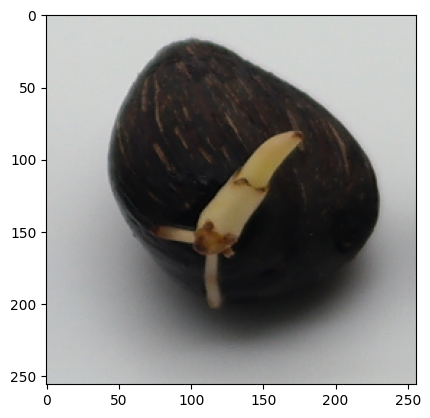

Label: 0


In [11]:
# Displaying an image from the batch
print(f"Image name: {img_name[0]}")
print(f"Image batch shape: {train_images.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_images[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0))
plt.show()
print(f"Label: {label}")